Load the fake.tsv and true.tsv files to run the notebook :)

#Creating the DataFrames and basic data manipulation to get it ready to analyze later





In [ ]:
#loading our data frame according to fake/new

import json
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing


fake_df = pd.read_table('fake.tsv', delimiter = '\t')
true_df = pd.read_table('true.tsv', delimiter = '\t')

# print("FAKE \n ", fake_df.describe())
# print("TRUE \n ", true_df.describe())



# print("FAKE DISTRIBUTIONS \n", fake_df.hist(bins=40, figsize=(50, 25)))


# print("TRUE DISTRIBUTIONS \n",true_df.hist(bins=40, figsize=(50, 25)))


In [ ]:
#NORMALIZING data for the fake_news df

fake_df.pop("text_key") # categorical value will trigger an error when normalizing so we take this column out
true_df.pop("text_key")


#normalizing data for the fake_news df

fake_max_scaled = pd.DataFrame()
for column in fake_df.columns:
  fake_max_scaled[column]=(fake_df[column]-fake_df[column].min())/(fake_df[column].max()-fake_df[column].min())

# # view normalized data

# print(display(fake_max_scaled))

# #normalizing data for the true_news df

true_max_scaled = pd.DataFrame()
for column in fake_df.columns:
  true_max_scaled[column]=(true_df[column]-true_df[column].min())/(true_df[column].max()-true_df[column].min())

# # view normalized data

# print(display(true_max_scaled))

#the normalized dfs are saved in fake_max_scaled and true_max_scaled

In [ ]:
true_max_scaled.transpose()  #for visual reference

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
id,0.000000,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.962343,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.000000
DESPC,0.571429,0.000000,0.000000,0.857143,0.000000,0.000000,0.714286,0.000000,0.571429,0.285714,...,0.000000,1.000000,0.571429,0.714286,0.857143,0.000000,0.857143,0.285714,0.000000,0.000000
DESSC,0.117647,0.294118,1.000000,0.235294,0.294118,0.294118,0.294118,0.235294,0.117647,0.117647,...,0.352941,0.117647,0.176471,0.117647,0.176471,0.176471,0.117647,0.000000,0.470588,0.176471
DESWC,0.182540,0.468254,1.000000,0.150794,0.206349,0.277778,0.170635,0.250000,0.234127,0.178571,...,0.353175,0.261905,0.174603,0.321429,0.246032,0.273810,0.250000,0.103175,0.519841,0.111111
DESPL,0.037736,0.320755,1.000000,0.060377,0.320755,0.320755,0.122642,0.264151,0.037736,0.075472,...,0.377358,0.015094,0.113208,0.037736,0.066038,0.207547,0.015094,0.000000,0.490566,0.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_AOA_MAX,0.376828,0.238470,0.442070,0.456693,0.250844,0.344207,0.600675,0.431946,0.373453,0.240720,...,0.638920,0.226097,0.575928,0.494938,0.453318,0.263963,0.281215,0.582677,0.388076,0.412823
WORD_PROPERTY_CONCRETENESS,0.284742,0.148768,0.184691,0.515868,0.561150,0.461879,0.712209,0.247434,0.564906,0.490946,...,0.360816,0.351323,0.727465,0.327885,0.845898,0.566979,0.426243,0.812008,0.464801,0.466606
WORD_PROPERTY_PREVALENCE,0.404779,0.686120,0.722098,0.816096,0.807438,0.153308,0.500284,0.556375,0.850389,0.719246,...,0.603935,0.706367,0.864182,0.471459,0.829124,0.568377,0.741069,0.687372,0.698401,0.616404
WORD_PROPERTY_PREVALENCE_MIN,0.404779,0.686120,0.722098,0.816096,0.807438,0.153308,0.500284,0.556375,0.850389,0.719246,...,0.603935,0.706367,0.864182,0.471459,0.829124,0.568377,0.741069,0.687372,0.698401,0.616404


# Calculating Shapiro p-value

In [ ]:
#calculating shapiro test, which indicates the probability of a distribution following normal curve

arrays_true = true_max_scaled.transpose()
arrays_fake = fake_max_scaled.transpose()

dic_arrays_true = {}
dic_arrays_fake = {}
shapiro_pvalue_fake = []
shapiro_pvalue_true = [] #list of the p.values, the index will be the same for the list and the feature

for i in range(len(arrays_true)):

  dic_arrays_true["array{}".format(i)] = np.array(arrays_true.iloc[i])
  res = stats.shapiro(dic_arrays_true["array{}".format(i)])
  shapiro_pvalue_true.append(res.pvalue)

  # print("shapiro true:", res.pvalue)
  #print(shapiro_pvalue_true)


for i in range(len(arrays_fake)):

  dic_arrays_fake["array{}".format(i)] = np.array(arrays_fake.iloc[i])
  res = stats.shapiro(dic_arrays_fake["array{}".format(i)])
  shapiro_pvalue_fake.append(res.pvalue)

  #print("shapiro fake:", res.pvalue)


# comparing shapiro tests for fake-true can tell us which features follow a normal distribution in fake news, which features follow normal distribution in real news

# for i in range(len(shapiro_pvalue_true)):
#   print("for shapiro test in index {}: shapiro fake".format(i), shapiro_pvalue_fake[i], "vs shapiro true", shapiro_pvalue_true[i])

# we know the indexes are the same because the result of the 'index' characteristic is the same for true and fake news

In [ ]:
# get the bulk of text to convert into the dictionary with the pvalues

# for col in true_max_scaled.columns:
#     print(col)

listaza = '''id
DESPC
DESSC
DESWC
DESPL
DESPLd
DESPLw
DESSL
DESSLd
DESWLsy
DESWLsyd
DESWLlt
DESWLltd
LDTTRc
LDTTRa
LDMTLD
LDHDD
SYNLE
SYNNP
SYNMEDpos
SYNMEDwrd
SYNMEDlem
SYNSTRUTa
SYNSTRUTt
RDFRE
READFKGL
TOKEN_ATTRIBUTE_RATIO_ALHPA
TOKEN_ATTRIBUTE_RATIO_DIGIT
TOKEN_ATTRIBUTE_RATIO_PUNCT
TOKEN_ATTRIBUTE_RATIO_URL
TOKEN_ATTRIBUTE_RATIO_EMAIL
WORD_SET_INCIDENCE_WRDPRP1s
WORD_SET_INCIDENCE_WRDPRP1p
WORD_SET_INCIDENCE_WRDPRP2
WORD_SET_INCIDENCE_WRDPRP3s
WORD_SET_INCIDENCE_WRDPRP3p
WORD_SET_INCIDENCE_CNCCaus
WORD_SET_INCIDENCE_CNCLogic
WORD_SET_INCIDENCE_CNCTemp
WORD_SET_INCIDENCE_CNCAdd
WORD_SET_INCIDENCE_CNCPos
WORD_SET_INCIDENCE_CNCNeg
WORD_PROPERTY_WRDNOUN
WORD_PROPERTY_WRDVERB
WORD_PROPERTY_WRDADJ
WORD_PROPERTY_WRDADV
WORD_PROPERTY_WRDFRQc
WORD_PROPERTY_WRDFRQa
WORD_PROPERTY_WRDFRQmc
WORD_PROPERTY_WRDFAMc
WORD_PROPERTY_WRDCNCc
WORD_PROPERTY_WRDIMGc
WORD_PROPERTY_WRDMEAc
WORD_PROPERTY_WRDPOLc
WORD_PROPERTY_WRDHYPn
WORD_PROPERTY_WRDHYPv
WORD_PROPERTY_WRDHYPnv
WORD_PROPERTY_AOA
WORD_PROPERTY_AOA_MAX
WORD_PROPERTY_CONCRETENESS
WORD_PROPERTY_PREVALENCE
WORD_PROPERTY_PREVALENCE_MIN
WORD_SET_INCIDENCE_C4_COMMON_WORDS'''

dict_ids = {}

dic_list = []
for word in listaza.split():
  dic_list.append(word)

dict_fake_pvalues = {dic_list[i]: shapiro_pvalue_fake[i] for i in range(len(dic_list))}

dict_true_pvalues = {dic_list[i]: shapiro_pvalue_true[i] for i in range(len(dic_list))}

# print(dict_fake_pvalues)

# now we have every feature associated with its pvalue in two dictionaries.

# if p value > 0.005, we accept H0 = the metric follows a normal curve in the fake/real subset of the corpus


# Adding the Shapiro p-value to our DFs and merging them

In [ ]:
# adding the shapiro pvalue to the true/false scaled dataframe

# adding the polarity

# when we combine both of these into one df, the indexes will be repeated,
# that is, the columns will be 0-240 and a column Shapiro Pval Fake and then another 0-240 and a column Shapiro Pval True
# so we can distinguish the indexes  by the polarity row which we are adding at the end



arrays_fake['Shapiro pval Fake'] = shapiro_pvalue_fake

arrays_fake.loc[len(arrays_fake)] = "Fake"
arrays_fake = arrays_fake.rename(index={63 : "Polarity"})

arrays_true['Shapiro pval True'] = shapiro_pvalue_true

arrays_true.loc[len(arrays_true)] = "True"
arrays_true = arrays_true.rename(index={63: "Polarity"})





In [ ]:
arrays_true

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Shapiro pval True
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0,0.000001
DESPC,0.571429,0.0,0.0,0.857143,0.0,0.0,0.714286,0.0,0.571429,0.285714,...,1.0,0.571429,0.714286,0.857143,0.0,0.857143,0.285714,0.0,0.0,0.0
DESSC,0.117647,0.294118,1.0,0.235294,0.294118,0.294118,0.294118,0.235294,0.117647,0.117647,...,0.117647,0.176471,0.117647,0.176471,0.176471,0.117647,0.0,0.470588,0.176471,0.0
DESWC,0.18254,0.468254,1.0,0.150794,0.206349,0.277778,0.170635,0.25,0.234127,0.178571,...,0.261905,0.174603,0.321429,0.246032,0.27381,0.25,0.103175,0.519841,0.111111,0.0
DESPL,0.037736,0.320755,1.0,0.060377,0.320755,0.320755,0.122642,0.264151,0.037736,0.075472,...,0.015094,0.113208,0.037736,0.066038,0.207547,0.015094,0.0,0.490566,0.207547,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.284742,0.148768,0.184691,0.515868,0.56115,0.461879,0.712209,0.247434,0.564906,0.490946,...,0.351323,0.727465,0.327885,0.845898,0.566979,0.426243,0.812008,0.464801,0.466606,0.06507
WORD_PROPERTY_PREVALENCE,0.404779,0.68612,0.722098,0.816096,0.807438,0.153308,0.500284,0.556375,0.850389,0.719246,...,0.706367,0.864182,0.471459,0.829124,0.568377,0.741069,0.687372,0.698401,0.616404,0.000379
WORD_PROPERTY_PREVALENCE_MIN,0.404779,0.68612,0.722098,0.816096,0.807438,0.153308,0.500284,0.556375,0.850389,0.719246,...,0.706367,0.864182,0.471459,0.829124,0.568377,0.741069,0.687372,0.698401,0.616404,0.000379
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.616319,0.616319,0.571126,0.109572,0.409722,0.301932,0.253378,0.245706,0.705791,0.68031,...,0.554649,0.413411,0.290478,0.441506,0.623859,0.387643,0.242686,0.143949,0.293511,0.600734


In [ ]:
arrays_fake


,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Shapiro pval Fake
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0,0.000001
DESPC,0.666667,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.666667,0.666667,0.666667,...,0.333333,0.166667,0.0,0.333333,0.333333,0.666667,0.666667,0.333333,0.666667,0.0
DESSC,0.0,0.272727,0.363636,0.272727,0.454545,0.181818,0.272727,0.272727,0.363636,0.454545,...,0.363636,0.090909,0.363636,0.545455,0.090909,0.272727,0.181818,0.181818,0.0,0.0
DESWC,0.187192,0.325123,0.35468,0.394089,0.37931,0.108374,0.152709,0.325123,0.433498,0.315271,...,0.20197,0.064039,0.546798,0.758621,0.147783,0.162562,0.08867,0.339901,0.157635,0.0
DESPL,0.0,0.125,0.166667,0.125,0.208333,0.25,0.125,0.125,0.166667,0.208333,...,0.166667,0.041667,0.416667,0.25,0.041667,0.125,0.083333,0.083333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.434696,0.676325,0.756879,0.899076,0.241192,0.431192,0.617345,0.905066,0.39365,0.245307,...,0.413116,0.576031,0.286607,0.391375,0.43231,0.622443,0.623273,0.732455,0.153201,0.358169
WORD_PROPERTY_PREVALENCE,0.637852,0.646687,0.615946,0.361177,0.460505,0.556734,0.607366,0.647786,0.709961,0.28916,...,0.29374,0.572493,0.586401,0.498432,0.620424,0.620231,0.575305,0.87355,0.749083,0.002348
WORD_PROPERTY_PREVALENCE_MIN,0.637852,0.646687,0.615946,0.361177,0.460505,0.556734,0.607366,0.647786,0.709961,0.28916,...,0.29374,0.572493,0.586401,0.498432,0.620424,0.620231,0.575305,0.87355,0.749083,0.002348
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.685198,0.252618,0.54636,0.367094,0.550734,0.416541,0.349198,0.511111,0.553029,0.448572,...,0.426653,0.691702,0.524716,0.518359,0.717905,0.436065,0.153198,0.565214,0.645977,0.726251


In [ ]:
# combining the different tables into a sigle one


true_and_fake = pd.concat([arrays_fake, arrays_true], axis = 1)

true_and_fake



,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Shapiro pval True
id,0.0,0.004184,0.008368,0.012552,0.016736,0.020921,0.025105,0.029289,0.033473,0.037657,...,0.966527,0.970711,0.974895,0.979079,0.983264,0.987448,0.991632,0.995816,1.0,0.000001
DESPC,0.666667,0.333333,0.333333,0.333333,0.333333,0.0,0.333333,0.666667,0.666667,0.666667,...,1.0,0.571429,0.714286,0.857143,0.0,0.857143,0.285714,0.0,0.0,0.0
DESSC,0.0,0.272727,0.363636,0.272727,0.454545,0.181818,0.272727,0.272727,0.363636,0.454545,...,0.117647,0.176471,0.117647,0.176471,0.176471,0.117647,0.0,0.470588,0.176471,0.0
DESWC,0.187192,0.325123,0.35468,0.394089,0.37931,0.108374,0.152709,0.325123,0.433498,0.315271,...,0.261905,0.174603,0.321429,0.246032,0.27381,0.25,0.103175,0.519841,0.111111,0.0
DESPL,0.0,0.125,0.166667,0.125,0.208333,0.25,0.125,0.125,0.166667,0.208333,...,0.015094,0.113208,0.037736,0.066038,0.207547,0.015094,0.0,0.490566,0.207547,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WORD_PROPERTY_CONCRETENESS,0.434696,0.676325,0.756879,0.899076,0.241192,0.431192,0.617345,0.905066,0.39365,0.245307,...,0.351323,0.727465,0.327885,0.845898,0.566979,0.426243,0.812008,0.464801,0.466606,0.06507
WORD_PROPERTY_PREVALENCE,0.637852,0.646687,0.615946,0.361177,0.460505,0.556734,0.607366,0.647786,0.709961,0.28916,...,0.706367,0.864182,0.471459,0.829124,0.568377,0.741069,0.687372,0.698401,0.616404,0.000379
WORD_PROPERTY_PREVALENCE_MIN,0.637852,0.646687,0.615946,0.361177,0.460505,0.556734,0.607366,0.647786,0.709961,0.28916,...,0.706367,0.864182,0.471459,0.829124,0.568377,0.741069,0.687372,0.698401,0.616404,0.000379
WORD_SET_INCIDENCE_C4_COMMON_WORDS,0.685198,0.252618,0.54636,0.367094,0.550734,0.416541,0.349198,0.511111,0.553029,0.448572,...,0.554649,0.413411,0.290478,0.441506,0.623859,0.387643,0.242686,0.143949,0.293511,0.600734


In [ ]:
true_and_fake.transpose()

,id,DESPC,DESSC,DESWC,DESPL,DESPLd,DESPLw,DESSL,DESSLd,DESWLsy,...,WORD_PROPERTY_WRDHYPn,WORD_PROPERTY_WRDHYPv,WORD_PROPERTY_WRDHYPnv,WORD_PROPERTY_AOA,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_PROPERTY_PREVALENCE_MIN,WORD_SET_INCIDENCE_C4_COMMON_WORDS,Polarity
0,0.0,0.666667,0.0,0.187192,0.0,0.0,0.103911,0.903743,0.0,1.0,...,0.244583,0.283489,0.388215,0.687937,0.396186,0.434696,0.637852,0.637852,0.685198,Fake
1,0.004184,0.333333,0.272727,0.325123,0.125,0.272727,0.157542,0.331016,0.509944,0.109532,...,0.267995,0.338908,0.076927,0.051748,0.309322,0.676325,0.646687,0.646687,0.252618,Fake
2,0.008368,0.333333,0.363636,0.35468,0.166667,0.363636,0.177654,0.254011,0.442546,0.19933,...,0.471208,0.183434,0.469044,0.238065,0.297608,0.756879,0.615946,0.615946,0.54636,Fake
3,0.012552,0.333333,0.272727,0.394089,0.125,0.272727,0.197765,0.398396,0.388716,0.191279,...,0.467174,0.17757,0.512643,0.110266,0.147246,0.899076,0.361177,0.361177,0.367094,Fake
4,0.016736,0.333333,0.454545,0.37931,0.208333,0.454545,0.177654,0.195569,0.227758,0.139367,...,0.622575,0.380685,0.427168,0.267677,0.617585,0.241192,0.460505,0.460505,0.550734,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.987448,0.857143,0.117647,0.25,0.015094,0.037203,0.091503,0.380734,0.38446,0.002353,...,0.455246,0.066528,0.234069,0.09754,0.281215,0.426243,0.741069,0.741069,0.387643,True
237,0.991632,0.285714,0.0,0.103175,0.0,0.048029,0.129751,0.642202,0.0,0.353339,...,0.592211,0.281358,0.521021,0.35235,0.582677,0.812008,0.687372,0.687372,0.242686,True
238,0.995816,0.0,0.470588,0.519841,0.490566,0.352941,0.578794,0.144954,0.189306,0.194554,...,0.492107,0.0,0.305626,0.095886,0.388076,0.464801,0.698401,0.698401,0.143949,True
239,1.0,0.0,0.176471,0.111111,0.207547,0.058824,0.237473,0.13211,0.240751,0.436061,...,0.633193,0.210672,0.45731,0.629851,0.412823,0.466606,0.616404,0.616404,0.293511,True


In [ ]:
# checking data types, for the sorting they have to be the same

true_and_fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, id to Polarity
Columns: 482 entries, 0 to Shapiro pval True
dtypes: object(482)
memory usage: 243.6+ KB


In [ ]:

#need to replace the polarity value "True\False" so that the sorting doesnt find conflicting data types

true_and_fake['Shapiro pval True'] = true_and_fake['Shapiro pval True'].replace(["True"], 0)

true_and_fake['Shapiro pval Fake'] = true_and_fake['Shapiro pval Fake'].replace(["Fake"], 0)



# Sorting test

In [ ]:
# sorting the characteristics acc to their shapiro pvalue in general, you can just skip to the following section

shapiro_fake = true_and_fake['Shapiro pval Fake'].sort_values(ascending=False)

shapiro_true = true_and_fake['Shapiro pval True'].sort_values(ascending=False)


# the 1s probably mean that the data was mostly 0 or NaN and probably refer to a very specific feature that only some text have it in a full capacity, thats why its 1



display(shapiro_fake)


true_and_fake.loc["TOKEN_ATTRIBUTE_RATIO_EMAIL"] # in this example, there are no values so thats why it is 0, the distribution is always the same

TOKEN_ATTRIBUTE_RATIO_EMAIL    1.000000e+00
DESPLd                         1.000000e+00
SYNSTRUTt                      1.000000e+00
WORD_PROPERTY_WRDNOUN          9.323262e-01
SYNMEDpos                      8.795682e-01
                                   ...     
WORD_SET_INCIDENCE_WRDPRP1p    5.241414e-25
WORD_SET_INCIDENCE_WRDPRP1s    6.741145e-28
WORD_SET_INCIDENCE_WRDPRP2     5.718903e-28
TOKEN_ATTRIBUTE_RATIO_URL      4.496656e-32
Polarity                       0.000000e+00
Name: Shapiro pval Fake, Length: 64, dtype: float64

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                    ... 
236                  NaN
237                  NaN
238                  NaN
239                  NaN
Shapiro pval True    1.0
Name: TOKEN_ATTRIBUTE_RATIO_EMAIL, Length: 482, dtype: object

In [ ]:


shapiro_true

TOKEN_ATTRIBUTE_RATIO_EMAIL           1.000000e+00
SYNSTRUTt                             1.000000e+00
WORD_PROPERTY_WRDIMGc                 9.516932e-01
WORD_SET_INCIDENCE_C4_COMMON_WORDS    6.007340e-01
WORD_PROPERTY_WRDVERB                 5.511293e-01
                                          ...     
WORD_SET_INCIDENCE_WRDPRP1p           4.121922e-25
WORD_SET_INCIDENCE_WRDPRP1s           6.653291e-27
WORD_SET_INCIDENCE_WRDPRP2            3.621045e-29
TOKEN_ATTRIBUTE_RATIO_URL             1.667365e-31
Polarity                              0.000000e+00
Name: Shapiro pval True, Length: 64, dtype: float64

# Filtering the Shapiro Values

In [ ]:
# basic filtering

p_thresh = 0.05

# normal distribution of features in BOTH real and fake news

common_features = true_and_fake[(true_and_fake['Shapiro pval Fake'] > p_thresh) & (true_and_fake['Shapiro pval True'] > p_thresh)]
common_features = common_features[['Shapiro pval Fake','Shapiro pval True']]
common_features



,Shapiro pval Fake,Shapiro pval True
LDTTRa,0.057822,0.297146
SYNNP,0.519353,0.387431
SYNMEDpos,0.879568,0.154059
SYNSTRUTt,1.000000,1.000000
TOKEN_ATTRIBUTE_RATIO_EMAIL,1.000000,1.000000
WORD_PROPERTY_WRDNOUN,0.932326,0.184130
WORD_PROPERTY_WRDVERB,0.159778,0.551129
WORD_PROPERTY_WRDFRQc,0.127442,0.201548
WORD_PROPERTY_WRDFRQa,0.074741,0.526761
WORD_PROPERTY_WRDIMGc,0.188764,0.951693


In [ ]:
for col in common_features.transpose():

  mean_true = true_max_scaled[col].mean()
  mean_false = fake_max_scaled[col].mean()
  print(col, "the value for TRUE is", mean_true, "vs the value for FAKE is", mean_false)

# we can reject this

LDTTRa the value for TRUE is 0.5447898386266649 vs the value for FAKE is 0.5952110892227854
SYNNP the value for TRUE is 0.5081249293473383 vs the value for FAKE is 0.43169413253540834
SYNMEDpos the value for TRUE is 0.6051422335963693 vs the value for FAKE is 0.46053512901783616
SYNSTRUTt the value for TRUE is nan vs the value for FAKE is nan
TOKEN_ATTRIBUTE_RATIO_EMAIL the value for TRUE is nan vs the value for FAKE is nan
WORD_PROPERTY_WRDNOUN the value for TRUE is 0.5321437949536542 vs the value for FAKE is 0.5234976156756216
WORD_PROPERTY_WRDVERB the value for TRUE is 0.4747203127875577 vs the value for FAKE is 0.4548764819786985
WORD_PROPERTY_WRDFRQc the value for TRUE is 0.4794905103386025 vs the value for FAKE is 0.5856057448534321
WORD_PROPERTY_WRDFRQa the value for TRUE is 0.4609463855278203 vs the value for FAKE is 0.6188925117023676
WORD_PROPERTY_WRDIMGc the value for TRUE is 0.504302259055534 vs the value for FAKE is 0.49001140309453256
WORD_PROPERTY_WRDHYPnv the value for 

In [ ]:
# normal distribution of features in true but not fake news

true_features = true_and_fake[(true_and_fake['Shapiro pval Fake'] < p_thresh) & (true_and_fake['Shapiro pval True'] > p_thresh)]
true_features = true_features[['Shapiro pval True','Shapiro pval Fake']]
true_features

,Shapiro pval True,Shapiro pval Fake
DESWLlt,0.080244,0.012444
LDTTRc,0.069324,0.028113
LDHDD,0.131540,0.000277
WORD_PROPERTY_WRDADJ,0.241410,0.038181
WORD_PROPERTY_WRDCNCc,0.064303,0.039957
WORD_PROPERTY_WRDPOLc,0.485722,0.000009


In [ ]:
# normal distribution of features in fake but not true news

fake_features = true_and_fake[(true_and_fake['Shapiro pval Fake'] > p_thresh) & (true_and_fake['Shapiro pval True'] < p_thresh)]
fake_features = fake_features[['Shapiro pval Fake','Shapiro pval True']]
fake_features

,Shapiro pval Fake,Shapiro pval True
DESPLd,1.000000,2.253603e-17
DESWLltd,0.340317,3.790143e-24
WORD_PROPERTY_WRDMEAc,0.062985,4.114252e-02
WORD_PROPERTY_WRDHYPn,0.204342,1.923876e-02
WORD_PROPERTY_AOA,0.055673,2.779025e-02


In [ ]:
list_of_features = []
features_true = []
features_false = []

for col in fake_features.transpose():

  mean = fake_max_scaled[col].mean()

  list_of_features.append(col)
  features_false.append(col)

  print("FAKE", col, mean)

for col in true_features.transpose():

  mean = true_max_scaled[col].mean()

  list_of_features.append(col)
  features_true.append(col)

  print("TRUE", col, mean)

print(list_of_features)

FAKE DESPLd 0.30585846758800433
FAKE DESWLltd 0.46023993198562985
FAKE WORD_PROPERTY_WRDMEAc 0.5142031543356782
FAKE WORD_PROPERTY_WRDHYPn 0.4352252284977142
FAKE WORD_PROPERTY_AOA 0.43849289740683806
TRUE DESWLlt 0.40729517385297215
TRUE LDTTRc 0.5981227885962578
TRUE LDHDD 0.5673999117205644
TRUE WORD_PROPERTY_WRDADJ 0.4336643158986035
TRUE WORD_PROPERTY_WRDCNCc 0.43879270279399574
TRUE WORD_PROPERTY_WRDPOLc 0.4848592406129377
['DESPLd', 'DESWLltd', 'WORD_PROPERTY_WRDMEAc', 'WORD_PROPERTY_WRDHYPn', 'WORD_PROPERTY_AOA', 'DESWLlt', 'LDTTRc', 'LDHDD', 'WORD_PROPERTY_WRDADJ', 'WORD_PROPERTY_WRDCNCc', 'WORD_PROPERTY_WRDPOLc']


# AGAINST ALL ODDS, THIS IS Why focusing on the distribution lexical diversity WILL NOT work


We decided to include this part in the report to illustrate why just looking at distributions will not be enough.

Filtering the text that have the highest lexical features indexes.


In [ ]:
texts_lexical_features = true_and_fake.transpose()

lexical_fts = texts_lexical_features[["LDTTRc", "LDHDD", "Polarity"]]

LDTTRC = lexical_fts.sort_values(by="LDTTRc", ascending = False)

LDHDD = lexical_fts.sort_values(by="LDHDD", ascending = False)




In [ ]:
lexical_fts.sort_values(['LDTTRc', 'LDHDD'], ascending=[False, False]) #for reference

,LDTTRc,LDHDD,Polarity
205,1.0,0.890809,True
22,1.0,0.69663,Fake
26,0.998468,0.851424,Fake
15,0.975105,0.426618,Fake
148,0.970026,0.522913,Fake
...,...,...,...
120,0.118455,0.228979,Fake
Shapiro pval True,0.069324,0.13154,0.0
Shapiro pval Fake,0.028113,0.000277,0.0
231,0.0,0.107516,True


In [ ]:
# filtering the text indexes by the top values

list_index_text = []



indexes_df = lexical_fts[lexical_fts.LDTTRc > 0.75]

more_filtering = indexes_df[indexes_df.LDHDD > 0.898187]

first_25 = more_filtering.sort_values(['LDTTRc', 'LDHDD'], ascending=[False, False])[:25]

for row in first_25.index:
  list_index_text.append(row)

print(list_index_text,"\n\n\n")

#A lot of fake text


[47, 14, 231, 157, 155, 28, 239, 8, 55, 68, 187, 133, 124, 175, 133, 96, 210] 


 SOOO MANY FAKE NEWS TEXT AT THE TOP


The top values are fake news, which should not be the case since we are looking for feature values to compliment what is not found in the fake news subset of the data.

<Axes: >

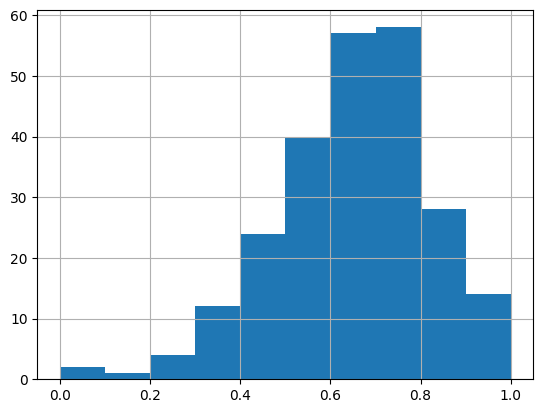

In [ ]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "Fake"]

new_df_2["LDHDD"].hist()

# distribution of LDHDD feature in fake news

<Axes: >

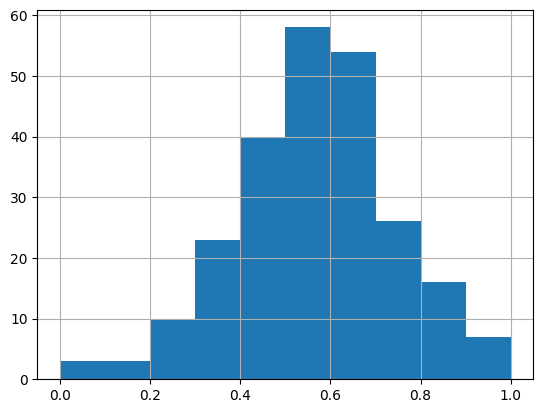

In [ ]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "True"]

new_df_2["LDHDD"].hist()

# distribution of LDHDD feature in fake news

<Axes: >

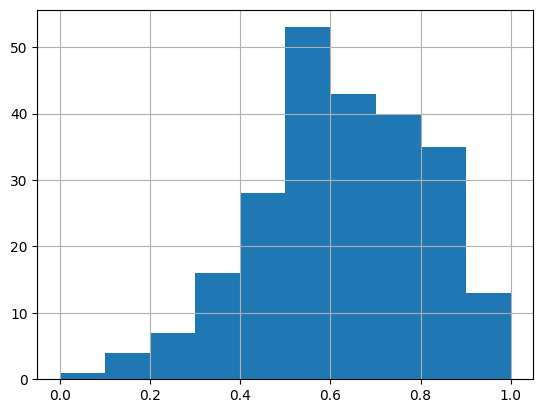

In [ ]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "Fake"]

new_df_2["LDTTRc"].hist()

# distribution of LDTTRc feature in fake news

<Axes: >

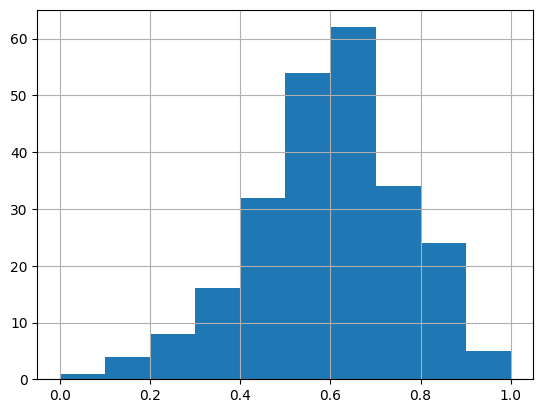

In [ ]:
new_df = true_and_fake.transpose()

new_df_2 = new_df[new_df.Polarity == "True"]

new_df_2["LDTTRc"].hist()

Comparing the distributions we can see that the bulk of the true news values are already covered in the fake news distribution.

# Comparing distributions to determine how we will filter the dataset

In [ ]:
texts_lexical_features = true_and_fake.drop(labels=['Shapiro pval Fake','Shapiro pval True'], axis = 1).transpose() #taking out the shapiro true/fake rows

LINGUISTIC FEATURE: DESPLd
Normal distribution in the FAKE text


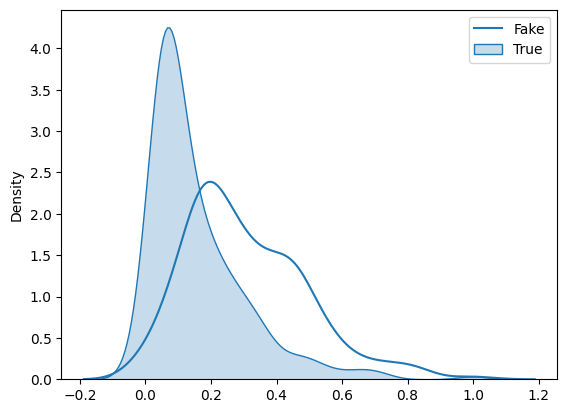

LINGUISTIC FEATURE: DESWLltd
Normal distribution in the FAKE text


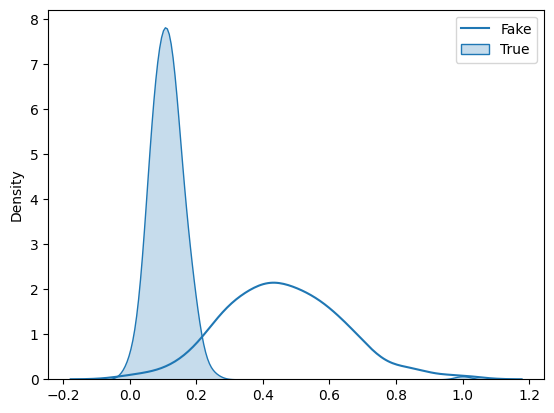

LINGUISTIC FEATURE: WORD_PROPERTY_WRDMEAc
Normal distribution in the FAKE text


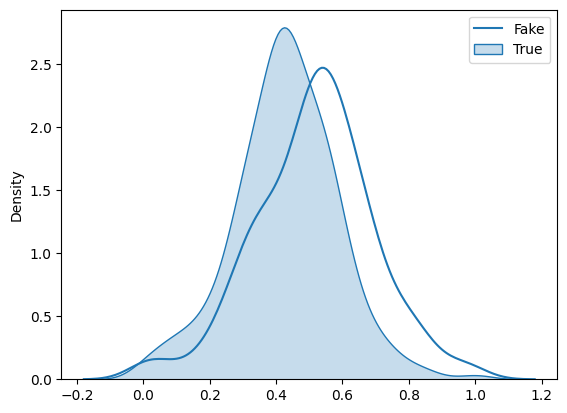

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPn
Normal distribution in the FAKE text


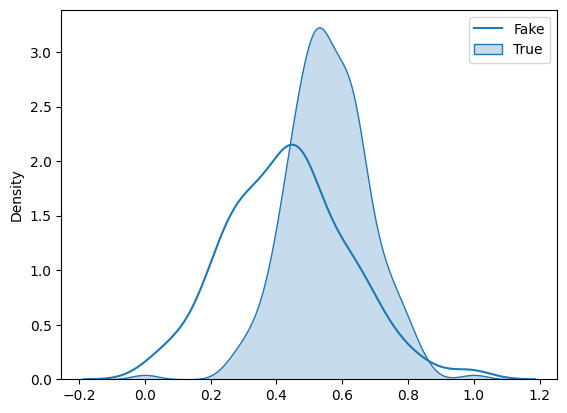

LINGUISTIC FEATURE: WORD_PROPERTY_AOA
Normal distribution in the FAKE text


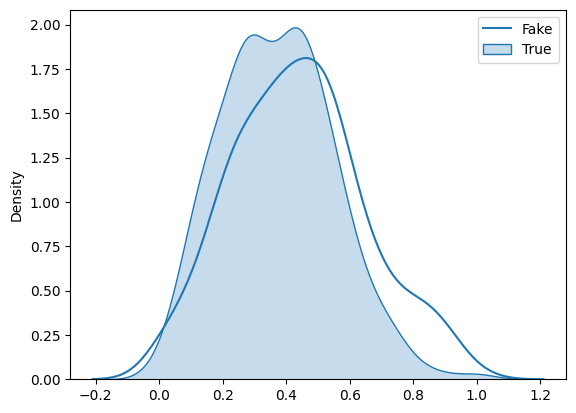

LINGUISTIC FEATURE: DESWLlt
Normal distributrion in the TRUE text


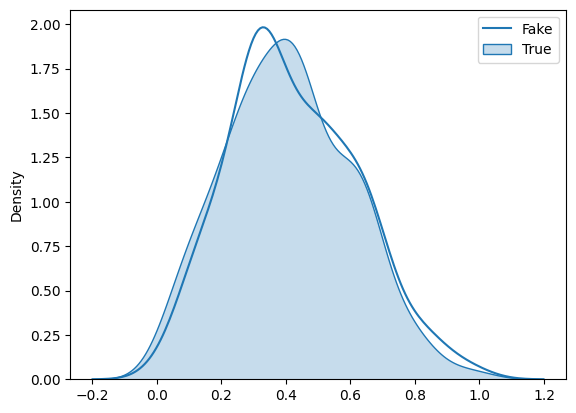

LINGUISTIC FEATURE: LDTTRc
Normal distributrion in the TRUE text


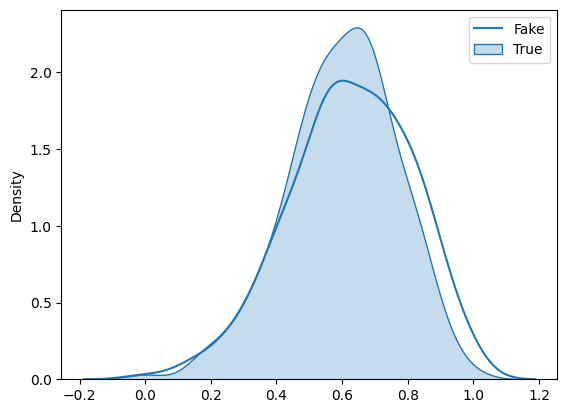

LINGUISTIC FEATURE: LDHDD
Normal distributrion in the TRUE text


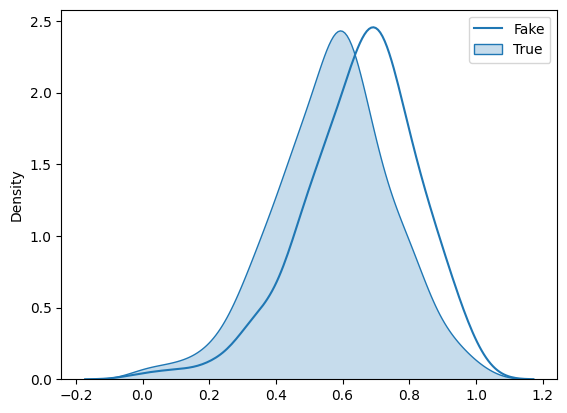

LINGUISTIC FEATURE: WORD_PROPERTY_WRDADJ
Normal distributrion in the TRUE text


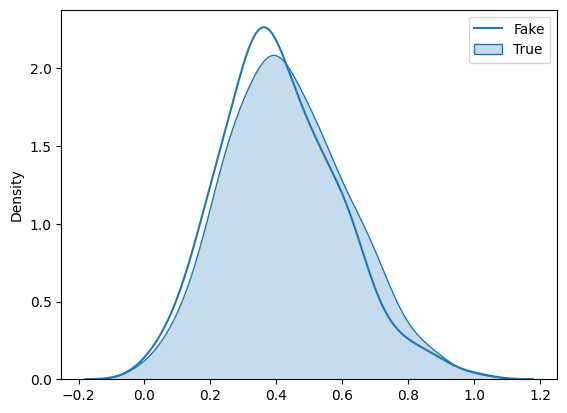

LINGUISTIC FEATURE: WORD_PROPERTY_WRDCNCc
Normal distributrion in the TRUE text


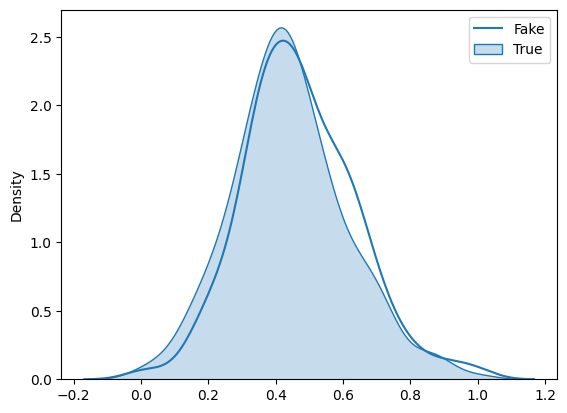

LINGUISTIC FEATURE: WORD_PROPERTY_WRDPOLc
Normal distributrion in the TRUE text


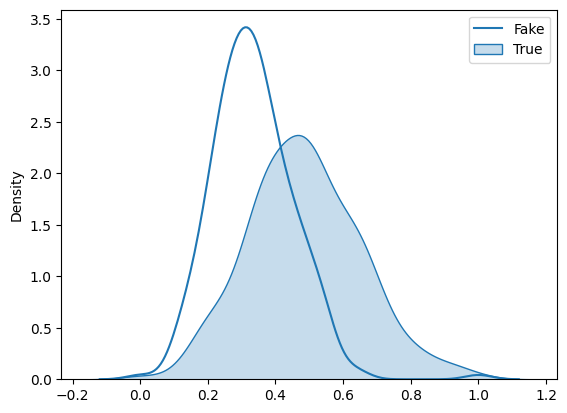

In [ ]:
# plotting all the distributions of the features that follow regular distribution in either true or fake news

import matplotlib.pyplot as plt
import seaborn as sns

for item in list_of_features:

  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion in the TRUE text")
  else:
    print("Normal distribution in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])

  plt.show()





LINGUISTIC FEATURE: LDTTRa
Normal distribution in the FAKE text


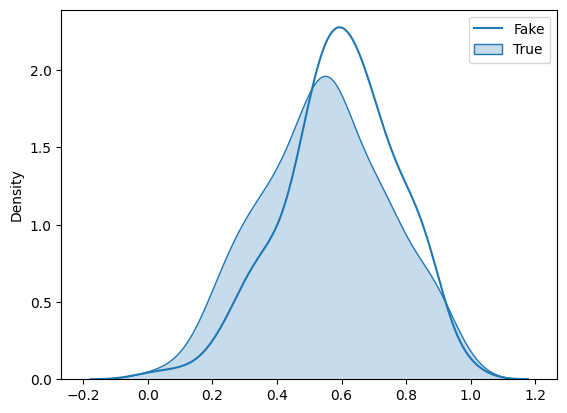

LINGUISTIC FEATURE: SYNNP
Normal distribution in the FAKE text


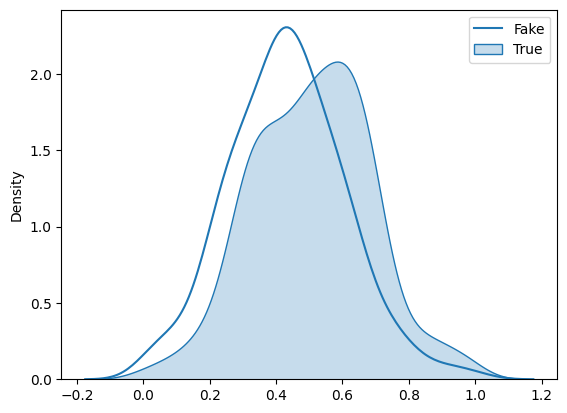

LINGUISTIC FEATURE: SYNMEDpos
Normal distribution in the FAKE text


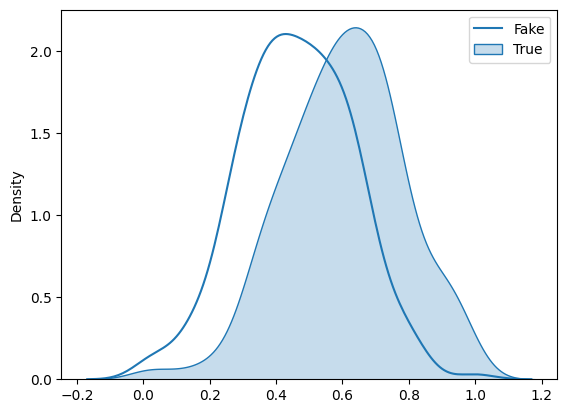

LINGUISTIC FEATURE: SYNSTRUTt
Normal distribution in the FAKE text


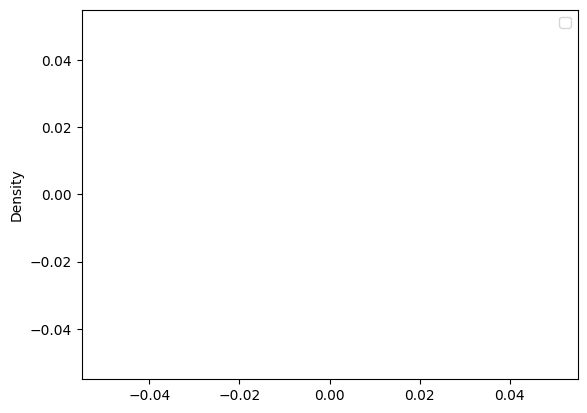

LINGUISTIC FEATURE: TOKEN_ATTRIBUTE_RATIO_EMAIL
Normal distribution in the FAKE text


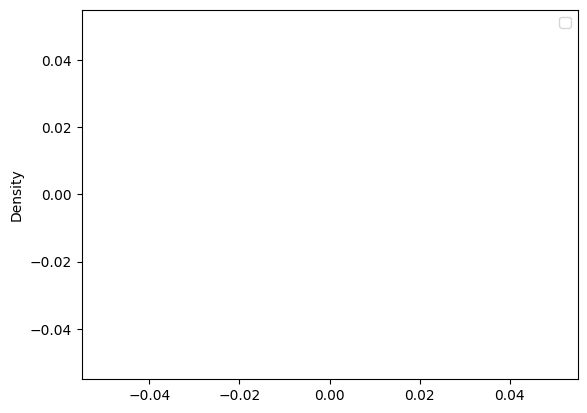

LINGUISTIC FEATURE: WORD_PROPERTY_WRDNOUN
Normal distribution in the FAKE text


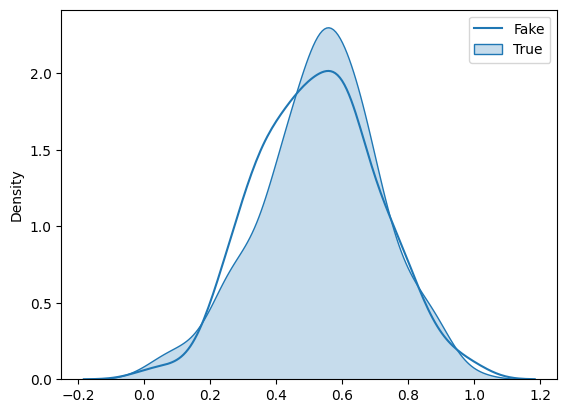

LINGUISTIC FEATURE: WORD_PROPERTY_WRDVERB
Normal distribution in the FAKE text


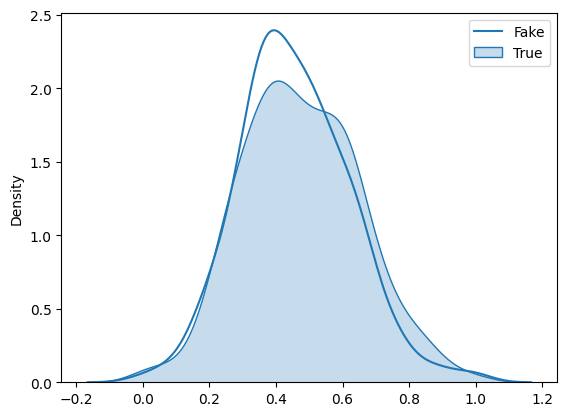

LINGUISTIC FEATURE: WORD_PROPERTY_WRDFRQc
Normal distribution in the FAKE text


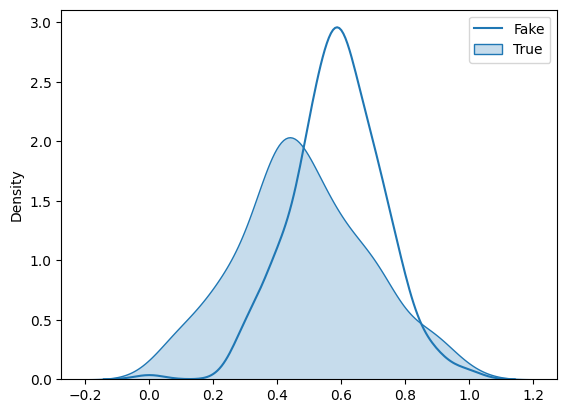

LINGUISTIC FEATURE: WORD_PROPERTY_WRDFRQa
Normal distribution in the FAKE text


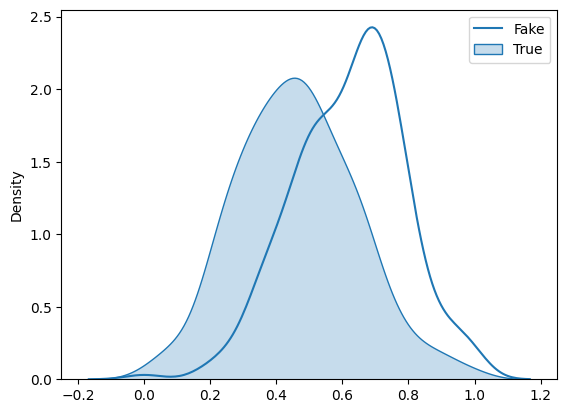

LINGUISTIC FEATURE: WORD_PROPERTY_WRDIMGc
Normal distribution in the FAKE text


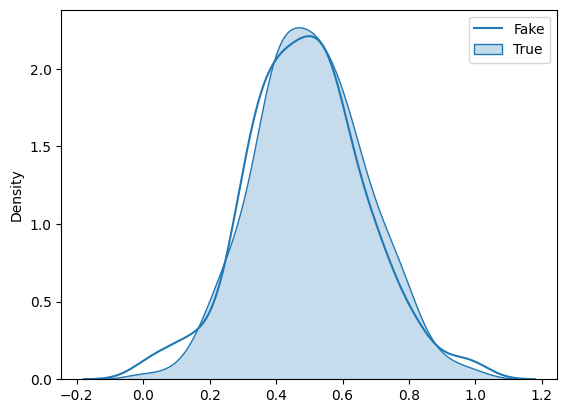

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPnv
Normal distribution in the FAKE text


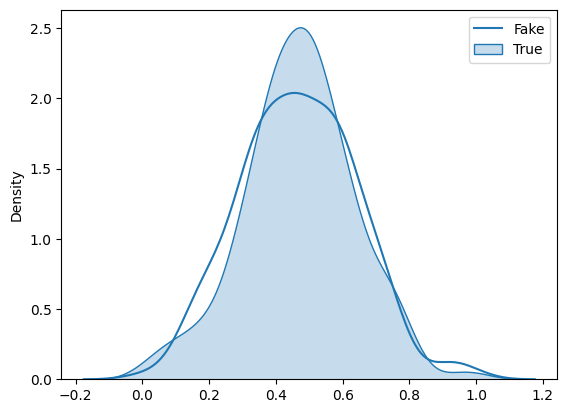

LINGUISTIC FEATURE: WORD_PROPERTY_CONCRETENESS
Normal distribution in the FAKE text


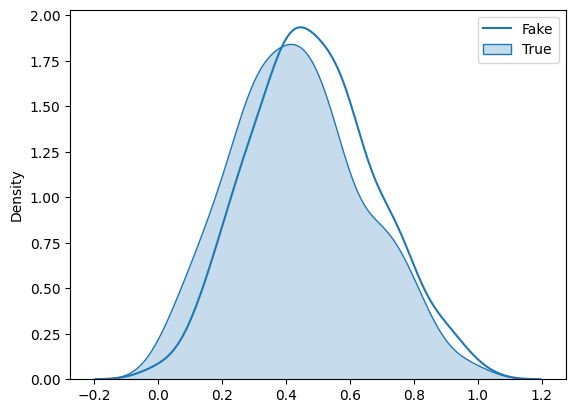

LINGUISTIC FEATURE: WORD_SET_INCIDENCE_C4_COMMON_WORDS
Normal distribution in the FAKE text


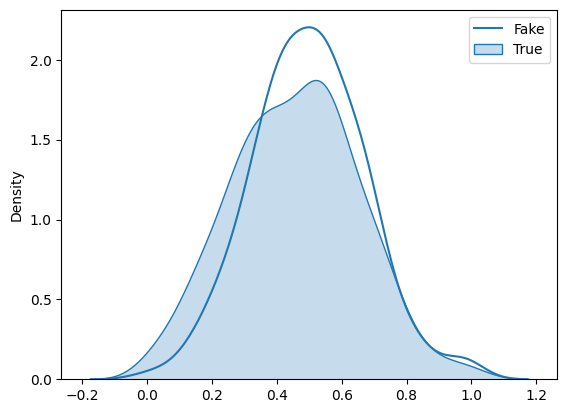

In [ ]:
#plotting the distributions for the features that follow a normal distribution in both true and fake news
common_features_list = []

for ft in common_features.transpose():
  common_features_list.append(ft)

# print(len(common_features_list))

for item in common_features_list:

  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion in the TRUE text")
  else:
    print("Normal distribution in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])

  plt.show()

LINGUISTIC FEATURE: DESPLd
Normal distribution occurs in the FAKE text


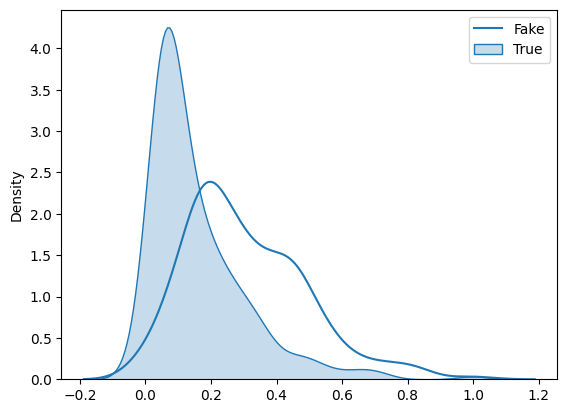

LINGUISTIC FEATURE: DESWLltd
Normal distribution occurs in the FAKE text


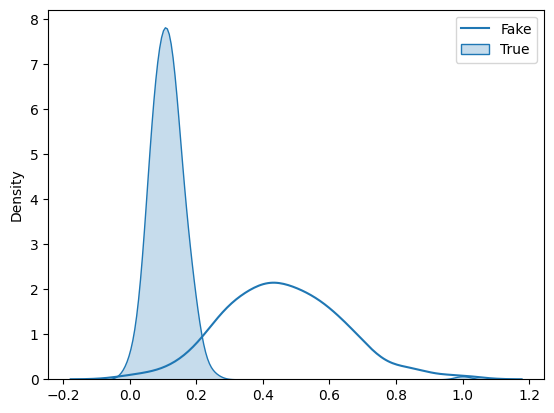

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPn
Normal distribution occurs in the FAKE text


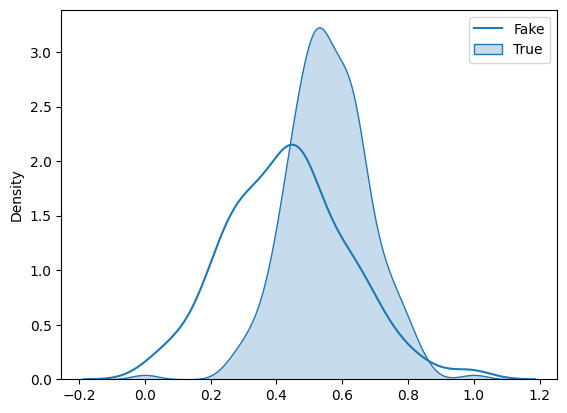

In [ ]:
list_potentially_interesitng = ["DESPLd", "DESWLltd", "WORD_PROPERTY_WRDHYPn"]


for item in list_potentially_interesitng:
  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion occurs in the TRUE text")
  else:
    print("Normal distribution occurs in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])
  plt.show()



QUANTILES

In [ ]:
lexical_fts_final = texts_lexical_features[["DESPLd", "DESWLltd", "WORD_PROPERTY_WRDHYPn", "Polarity"]]
lexical_fts_final

,DESPLd,DESWLltd,WORD_PROPERTY_WRDHYPn,Polarity
0,0.0,0.998218,0.244583,Fake
1,0.272727,0.221451,0.267995,Fake
2,0.363636,0.198063,0.471208,Fake
3,0.272727,0.212835,0.467174,Fake
4,0.454545,0.225762,0.622575,Fake
...,...,...,...,...
235,0.176471,0.062359,0.506349,True
236,0.037203,0.0,0.455246,True
237,0.048029,0.095503,0.592211,True
238,0.352941,0.066419,0.492107,True


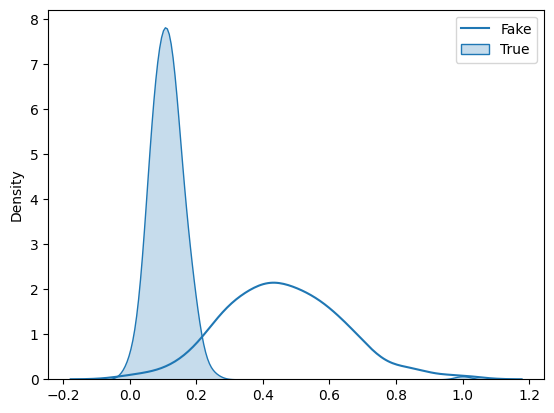

In [ ]:
# plotting DESWLltd again for visual ref


# sns.kdeplot(target_FAKE[["DESWLltd"]], color="grey")

# sns.kdeplot(target_TRUE[["DESWLltd"]], fill=True)
# plt.legend(labels = ["Fake", "True"])
# plt.show()

In [ ]:
#checking the amount of data that we could filter for the main feature and where it comes from

print("If we focused on DESWLltd alone \n\n")

DESWlltd_threshold = 0.12

# print("Mean value for DESLltd regardless of T/F", lexical_fts_final['DESWLltd'].mean())

print("Total amount of text:", lexical_fts_final.shape[0], "instances.")

print("Amount of text below {} DESWlltd:".format(DESWlltd_threshold), lexical_fts_final[lexical_fts_final['DESWLltd']< DESWlltd_threshold].shape[0], "instances.")

print("Amount of TRUE label text below {} DESWlltd:".format(DESWlltd_threshold), lexical_fts_final[(lexical_fts_final['Polarity']=='True') & (lexical_fts_final['DESWLltd']< DESWlltd_threshold)].shape[0], "instances.")

print("Amount of FAKE text below {} DESWlltd:".format(DESWlltd_threshold), lexical_fts_final[(lexical_fts_final['Polarity']=='Fake') & (lexical_fts_final['DESWLltd']< DESWlltd_threshold)].shape[0], "instances.")

If we focused on DESWLltd alone 


Total amount of text: 480 instances.
Amount of text below 0.12 DESWlltd: 144 instances.
Amount of TRUE label text below 0.12 DESWlltd: 139 instances.
Amount of FAKE text below 0.12 DESWlltd: 5 instances.


LINGUISTIC FEATURE: DESPLd
Normal distribution occurs in the FAKE text


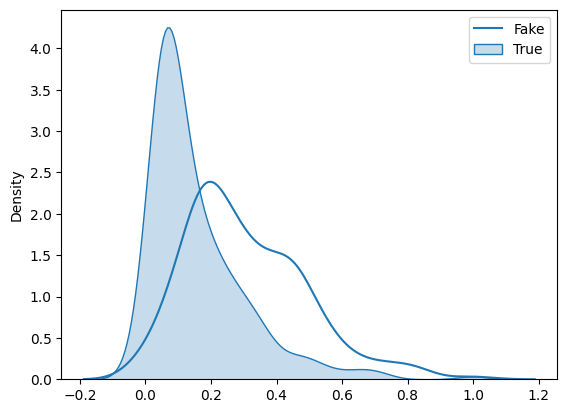

LINGUISTIC FEATURE: DESWLltd
Normal distribution occurs in the FAKE text


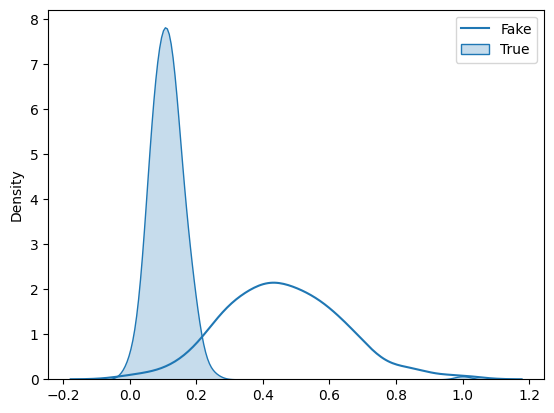

LINGUISTIC FEATURE: WORD_PROPERTY_WRDHYPn
Normal distribution occurs in the FAKE text


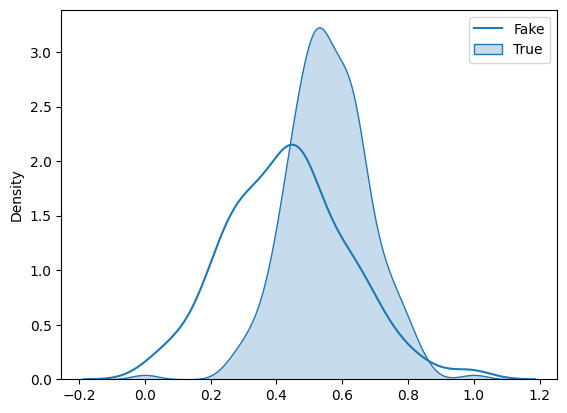

In [ ]:
# plotting all the features again for visual ref


for item in list_potentially_interesitng:
  print("LINGUISTIC FEATURE:", item)
  if item in features_true:
    print("Normal distributrion occurs in the TRUE text")
  else:
    print("Normal distribution occurs in the FAKE text")
  new_df = true_and_fake.transpose()
  target_FAKE = new_df[new_df['Polarity'] == "Fake"]
  target_TRUE = new_df[new_df['Polarity'] == "True"]


  sns.kdeplot(target_FAKE[[item]], color="grey")

  sns.kdeplot(target_TRUE[[item]], fill=True)
  plt.legend(labels = ["Fake", "True"])
  plt.show()

In [ ]:
# mean, standard value and potential target values for the linguistic features in the fake text
# targetting +- 2*std


DESWLltd_std = target_FAKE['DESWLltd'].std()
WORD_PROPERTY_WRDHYPn_std = target_FAKE['WORD_PROPERTY_WRDHYPn'].std()
DESPLd_std = target_FAKE['DESPLd'].std()


DESWLltd_mean = target_FAKE['DESWLltd'].mean()
WORD_PROPERTY_WRDHYPn_mean = target_FAKE['WORD_PROPERTY_WRDHYPn'].mean()
DESPLd_mean = target_FAKE['DESPLd'].mean()

value_target_DESWLltd = DESWLltd_mean - (2 * DESWLltd_std)
value_target_WORD_PROPERTY_WRDHYPn = WORD_PROPERTY_WRDHYPn_mean + (2 * WORD_PROPERTY_WRDHYPn_std)
value_target_DESPLd = DESPLd_mean - (2 * DESPLd_std)

print("Target values:\nDESWLltd: {} \nWORD_PROPERTY_WRDHYPn: {} \nDESPLd: {}".format(value_target_DESWLltd, value_target_WORD_PROPERTY_WRDHYPn, value_target_DESPLd))

Target values:
DESWLltd: 0.10674640569335975 
WORD_PROPERTY_WRDHYPn: 0.8047452880890275 
DESPLd: -0.05974654643362515


In [ ]:
#filtering by these conditions only gives us one piece of data so moveing the target_values towards the mean we get a more sizeable list of texts we can use

ideal_DESWLltd = (lexical_fts_final['DESWLltd']< value_target_DESWLltd)
ideal_WORD_PROPERTY_WRDHYPn = (lexical_fts_final['WORD_PROPERTY_WRDHYPn'] > value_target_WORD_PROPERTY_WRDHYPn)
ideal_DESPLd = (lexical_fts_final['DESPLd'] < value_target_DESPLd)

count_ideal_scenario = lexical_fts_final[(ideal_DESWLltd) & (ideal_WORD_PROPERTY_WRDHYPn)].shape[0] + lexical_fts_final[(ideal_DESWLltd) & (ideal_DESPLd)].shape[0]

print("In a perfect world we would like to use these conditions but we only get {} texts.".format(count_ideal_scenario))

In a perfect world we would like to use these conditions but we only get 1 texts.


In [ ]:
# trying combinations of different indexes to get a more sizeable subset of the data

# rational behind the filtering: we would want to get text that is in the gap of the distributions between fake/real: text with features characteristic of real news that are lacking in the fake corpus

# that translates to low DESWLltd, low DESPLd but high WORD_PROPERTY_WRDHYPn

print("Trying more intentional filtering with DESWLltd as our primary linguistic feature but adding filtering according to DESPLd or WORD_PROPERTY_WRDHYPn values \n\n")

DESWlltd_threshold = 0.12
WORD_PROPERTY_WRDHYPn_threshold = 0.65
DESPLd_threshold = 0.1


condition_DESWLltd = (lexical_fts_final['DESWLltd'] < DESWlltd_threshold)
condition_WORD_PROPERTY_WRDHYPn = (lexical_fts_final['WORD_PROPERTY_WRDHYPn'] > WORD_PROPERTY_WRDHYPn_threshold)
condition_DESPLd = (lexical_fts_final['DESPLd'] < DESPLd_threshold)



print("Total amount of text:", lexical_fts_final.shape[0], "instances.")

print("Amount of text below {} DESWLltd:".format(DESWlltd_threshold), lexical_fts_final[condition_DESWLltd].shape[0], "instances.")

print("Amount of text below {} DESWLltd and above {} WORD_PROPERTY_WRDHYPn:".format(DESWlltd_threshold,WORD_PROPERTY_WRDHYPn_threshold), lexical_fts_final[(condition_DESWLltd) & (condition_WORD_PROPERTY_WRDHYPn)].shape[0])

print("Amount of text below {} DESWLltd and above {} DESPLd:".format(DESWlltd_threshold,DESPLd_threshold), lexical_fts_final[(condition_DESWLltd) & (condition_DESPLd)].shape[0])


count = lexical_fts_final[((condition_DESWLltd) & (condition_WORD_PROPERTY_WRDHYPn)) | ((condition_DESWLltd) & (condition_DESPLd))].shape[0]

print("Total amount for intentional filtering:", count)


Trying more intentional filtering with DESWLltd as our primary linguistic feature but adding filtering according to DESPLd or WORD_PROPERTY_WRDHYPn values 


Total amount of text: 480 instances.
Amount of text below 0.12 DESWLltd: 144 instances.
Amount of text below 0.12 DESWLltd and above 0.65 WORD_PROPERTY_WRDHYPn: 29
Amount of text below 0.12 DESWLltd and above 0.1 DESPLd: 60
Total amount for intentional filtering: 76


In [ ]:
#performing the general filtering for the top/bottom 25 % of text for each feature individually

# we will probably not use this however

list_index_text_WORD_PROPERTY_WRDHYPn = []
list_index_text_DESPLd = []
list_index_text_DESWLltd = []

for col in lexical_fts_final:
  if col == "WORD_PROPERTY_WRDHYPn":
    first_25 = lexical_fts_final.sort_values([col], ascending=[True])[:120]
    for row in first_25.index:

      polarity_val = first_25["Polarity"]
      tuple_val = (row, polarity_val)
      list_index_text_WORD_PROPERTY_WRDHYPn.append(tuple_val)

  elif col == "DESWLltd":
    first_25 = lexical_fts_final.sort_values([col], ascending=[True])[:120]
    for row in first_25.index:

      polarity_val = first_25["Polarity"]
      tuple_val = (row, polarity_val)
      list_index_text_DESWLltd.append(tuple_val)


  else:

    first_25 = lexical_fts_final.sort_values([col], ascending=[False])[:120]

    for row in first_25.index:

      polarity_val = first_25["Polarity"]

      tuple_val = (row, polarity_val)

      if col == "DESPLd":
        list_index_text_DESPLd.append(tuple_val)



# print("WORD_PROPERTY_WRDHYPn list of indeces", list_index_text_WORD_PROPERTY_WRDHYPn, "\n\n\n")
# print("WORD_PROPERTY_DESPLd list of indeces", list_index_text_DESPLd, "\n\n\n")
# print("WORD_PROPERTY_DESWLltd list of indeces", list_index_text_DESWLltd, "\n\n\n")


In [ ]:
# merging the conditions into two tables

filter_1 = lexical_fts_final[(condition_DESWLltd) & (condition_WORD_PROPERTY_WRDHYPn)]

filter_2 = lexical_fts_final[(condition_DESWLltd) & (condition_DESPLd)]

for row in filter_1.index:
  if row in filter_2.index:
    print("Found")
  else:
    print("Not found")

Not found
Found
Found
Found
Found
Not found
Not found
Found
Found
Not found
Found
Found
Not found
Found
Found
Found
Found
Not found
Not found
Found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found
Not found


In [ ]:
#Putting the indexes and polarity of both tables into a list of tuples

filtered_indexes = []

for row in filter_1.index:

  polarity_val = filter_1["Polarity"]
  tuple_val = (row, polarity_val)
  # print(tuple_val)
  filtered_indexes.append(tuple_val)

for row in filter_2.index:

  polarity_val = filter_2["Polarity"]
  tuple_val = (row, polarity_val)
  filtered_indexes.append(tuple_val)

print("List of indexes and polarity", filtered_indexes)

print("Cheking the lengh is equal to the count", len(filtered_indexes))

List of indexes and polarity [(1, 1      True
6      True
20     True
51     True
52     True
53     True
55     True
61     True
63     True
67     True
68     True
69     True
81     True
96     True
110    True
111    True
135    True
138    True
147    True
149    True
167    True
190    True
198    True
199    True
209    True
219    True
226    True
230    True
234    True
Name: Polarity, dtype: object), (6, 1      True
6      True
20     True
51     True
52     True
53     True
55     True
61     True
63     True
67     True
68     True
69     True
81     True
96     True
110    True
111    True
135    True
138    True
147    True
149    True
167    True
190    True
198    True
199    True
209    True
219    True
226    True
230    True
234    True
Name: Polarity, dtype: object), (20, 1      True
6      True
20     True
51     True
52     True
53     True
55     True
61     True
63     True
67     True
68     True
69     True
81     True
96     True
110    True
111    True
135  